# Übung 3
## Aufgabe 1: Hough für Linien
### Linien zeichnen
Implementiere eine Funktion zum Zeichnung von Linien, gegeben eine Parameterkombination der Hesseschen Normalform. Zeichne die Geraden (a, r): (20, 20), (20, 10), (110, 0), (-70, 10)

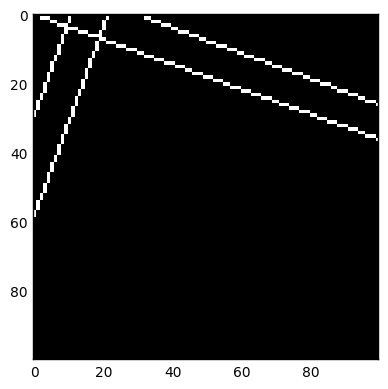

In [2]:
%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np
def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 20, 20)
image = draw_line_hessian_normal(image, 20, 10)
image = draw_line_hessian_normal(image, 110, 0)
image = draw_line_hessian_normal(image, -70, 10)
io.imshow(image)


### Hough-Akkumulator
Implementiere das Füllen des Hough-Akkumulators, gegeben: ein Kantenbild. Zurückgegeben werden soll der Akkumulator als Matrix. 

In [3]:
#accuracy: auflösung des winkels. 1 bedeutet in 1°-schritten, d.h. 0°,1°,2°,3°,...; 2: 0°,2°,4°,6°
def fill_hough_accumulator(image, accuracy):
    maxradius = math.hypot(image.shape[0], image.shape[1])
    angles = round(360/accuracy)
    acc = np.zeros((maxradius, angles))
    for (y,x),value in np.ndenumerate(image):
        if (value == 1):
            for angle in range(0,angles):
                d = round(x * math.cos(math.radians(angle*accuracy))
                          + y * math.sin(math.radians(angle*accuracy)))
                acc[d,angle] += 1
    return acc

Zeige den Akkumulator als Bild für zwei Eingaben: (1) ein Bild mit zwei beliebigen (nicht gleichen) Kantenpixeln. Füge einen weiteren Kantenpixel hinzu, der in der Nähe des Mittelpunkts beider Positionen liegt (2) und zeige den Akkumulator für diese "krumme Kante". 

c:\users\sebu\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\sebu\appdata\local\programs\python\python35-32\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


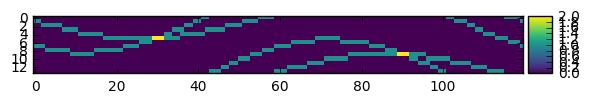

In [4]:
image = np.zeros((10,10))
image[5,1] = 1
image[5,7] = 1
io.imshow(fill_hough_accumulator(image, 3))

c:\users\sebu\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\sebu\appdata\local\programs\python\python35-32\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


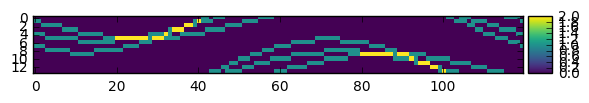

In [5]:
image[4,4] = 1
io.imshow(fill_hough_accumulator(image, 3))

### Extraktion der höchstbewerteten Geraden
Letzter Schritt: Schreibe eine Funktion, die die besten n Parameterkombinationen findet und zurückgibt.

In [6]:
def find_n_local_maxima(acc, n):
    args = np.argsort(acc, axis=None)[(acc.size-n):]
    print(args)
    ret = np.empty((n), dtype=tuple)
    for x in range(0,n):
        ret[n-x-1] = (math.fmod(args[x], acc.shape[1]) * (360/acc.shape[1]), math.floor(args[x] / acc.shape[1]))
    return ret

### Geraden finden!
Nimm Dir das Bild "images/street.jpg", benutze den Canny-Kantendetektor (entweder Deinen eigenen aus der vorigen Übung oder den von skimage) um ein Kantenbild zu erzeugen und benutze alle Funktionen dieses Zettels um die n besten Linien zu finden und zu zeichnen. Variiere die Canny-Schwellwerte und die Standardabweichung des Gaußkernels für die Weichzeichnung, um gute und schlechte Kantenbilder zu generieren. 

Oh, und wusstest Du, dass Du die execution time einer Zelle mit dem initialen Statement "%%time" einschalten kannst? Miss doch mal die Laufzeit deiner Hough-Implementierung für Bilder mit vielen oder wenigen Kantenpixeln.  


Wall time: 1.23 s


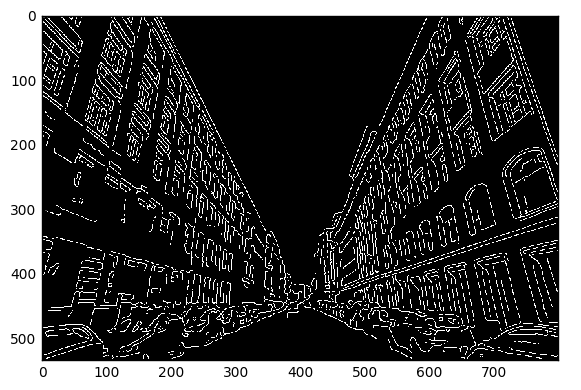

In [7]:
%%time
%matplotlib inline 
from skimage import io, feature, color
import numpy as np

image = io.imread('images/street.jpg')
edges1 = feature.canny(color.rgb2gray(image), 2)

io.imshow(edges1)

c:\users\sebu\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[107665  65455  82567  90577  68506  72643 104596 100453 146956  93639
  26266  79509   2768 170438  82124  91034  77348  95798  98635  74605
 168730   4480 101194  74802  71944    339  98292 172869  59452 113722
  98112  74982  93195  79965  69204 104034  75186  97956  75366  97776
 143357 143537  29867  29687  74286  98856    159     69  15463 157753]
Wall time: 19.6 s


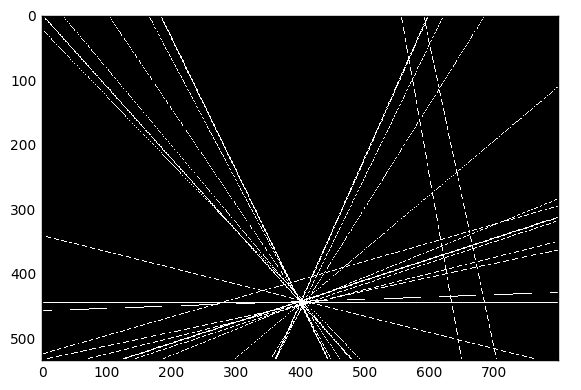

In [8]:
%%time
#start ht
ht_acc = fill_hough_accumulator(edges1, 2)
ht_lines = find_n_local_maxima(ht_acc, 50)

ht_img = np.zeros(edges1.shape)

for ht_line in range(0,ht_lines.size):
    ht_img = draw_line_hessian_normal(ht_img, ht_lines[ht_line][0], ht_lines[ht_line][1])
    
io.imshow(ht_img)